In [1]:
import matplotlib.pyplot as plt

In [2]:
thread_count = [4, 8, 16]
element_count = [100000, 1000000, 100000000]

In [3]:
consistent_data = {4: [0.000613, 0.006263, 0.595983], 8: [0.000613,0.006266,0.595525], 16: [0.000898,0.009169, 0.862801 ]}
parallel_data = {4:[0.001050,0.012395, 0.792536], 8: [0.001315,0.018534,0.861141], 16:[0.001869,0.022599, 0.969396 ]}

**Визуализация времени работы программы к размерности программы:**

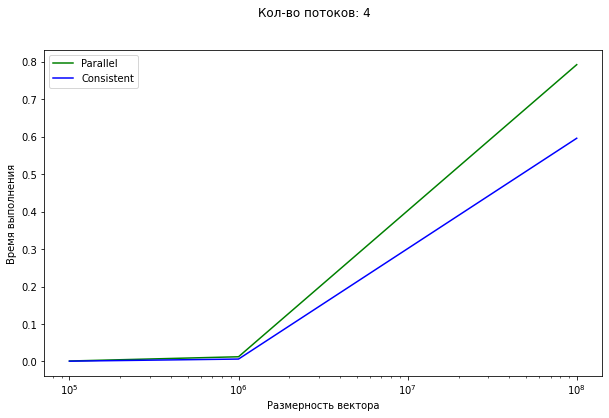

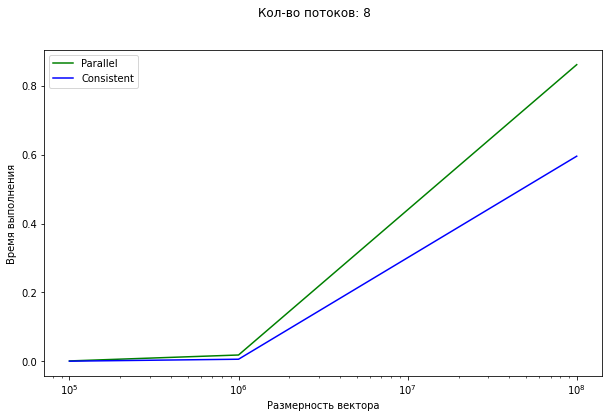

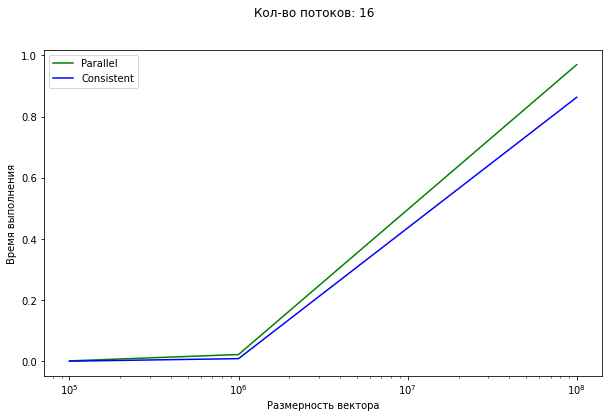

In [4]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, parallel_data[thread_count[i]], label = "Parallel", color='g')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='b')

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

Для задачи скалярного произведения неэффективно использовать системы с распределенной памятью,
поскольку вычислительная нагрузка мала в сравнение с затратами на пересылку данных.

**Визуализация времени работы программы к кол-ву потоков:**

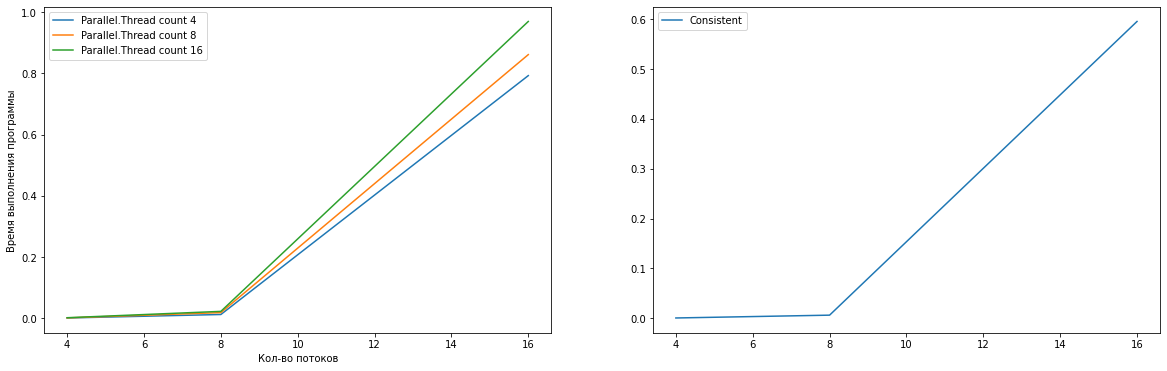

In [5]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20, 6))
ax1.set_xlabel('Кол-во потоков')
ax1.set_ylabel('Время выполнения программы')

ax2.plot(thread_count, consistent_data[thread_count[1]], label = 'Consistent')
for i in range(len(parallel_data)):
    ax1.plot(thread_count, parallel_data[thread_count[i]], label = 'Parallel.Thread count ' + str(thread_count[i]))
    
ax1.legend()
ax2.legend()

При увелечении числа потоков исполнение программы заметно тормозит. Однозначно, нет смысла использовать MPI в задачах такого рода

**Визуализация ускорения работы программы:**

In [6]:
speed_up_consistent = {k: [ b/m if m else 1 for b,m in zip(consistent_data[k], consistent_data[k])] for k in consistent_data if k in consistent_data}
speed_up_parallel = {k: [ b/m if m else 1 for b, m in zip(consistent_data[k], parallel_data[k])] for k in consistent_data if k in parallel_data}

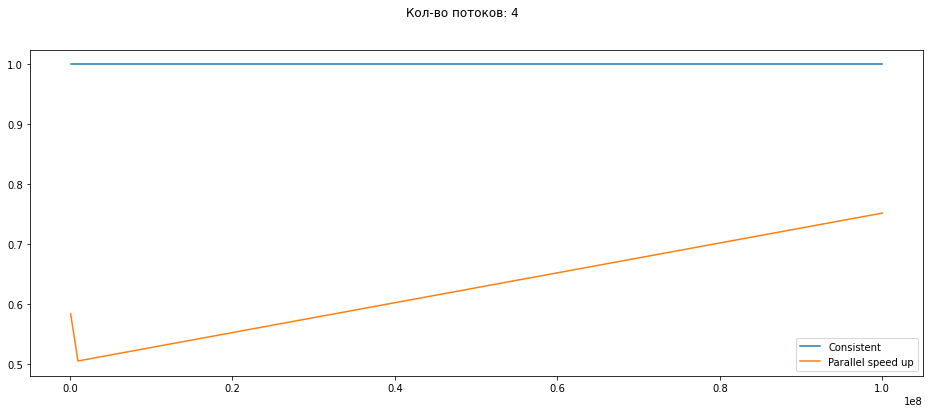

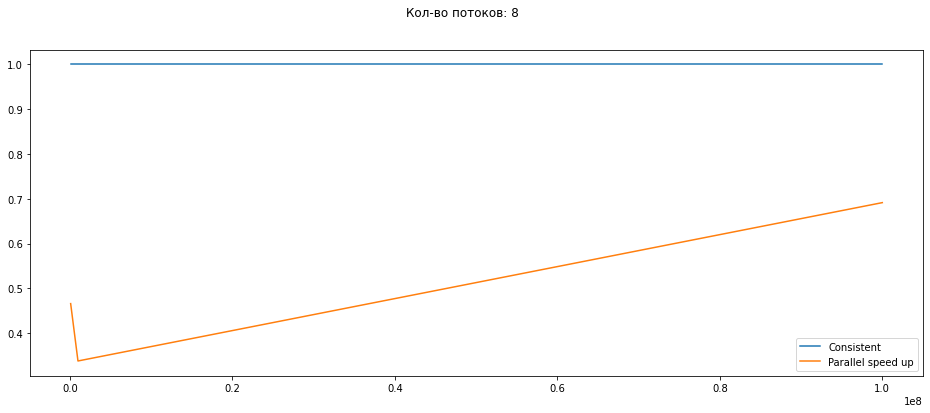

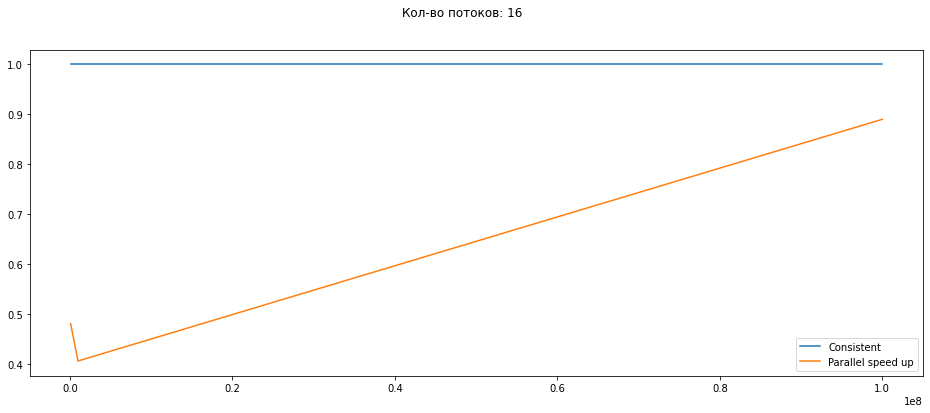

In [8]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(16, 6))
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))

    ax1.plot(element_count, speed_up_consistent[thread_count[i]], label = "Consistent")
    ax1.plot(element_count, speed_up_parallel[thread_count[i]], label = "Parallel speed up")
    ax1.legend()